In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.data import loadlocal_mnist
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn import preprocessing
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import label_binarize

In [3]:
x, y = loadlocal_mnist("train-images-idx3-ubyte", "train-labels-idx1-ubyte")
x_test, y_test = loadlocal_mnist("t10k-images-idx3-ubyte",
                                 "t10k-labels-idx1-ubyte")

In [4]:
x = preprocessing.normalize(x)
x_test = preprocessing.normalize(x_test)

In [5]:
for i in range(10):
    cp_y = np.copy(y)
    cp_ytest = np.copy(y_test)
    cp_y = np.where(cp_y == i, 1, 0)
    cp_ytest = np.where(cp_ytest == i, 1, 0)
    logreg = LogisticRegression(penalty="l1", solver="liblinear")
    logreg.fit(x, cp_y)
    print(100*logreg.score(x, cp_y), 'for', i, 'train l1')
    print(100*logreg.score(x_test, cp_ytest), 'for', i, 'test l1')
    logreg = LogisticRegression(penalty="l2", solver="liblinear")
    logreg.fit(x, cp_y)
    print(100*logreg.score(x, cp_y), 'for', i, 'train l2')
    print(100*logreg.score(x_test, cp_ytest), 'for', i, 'test l2','\n \n')

99.23666666666666 for 0 train l1
99.2 for 0 test l1
99.17833333333334 for 0 train l2
99.16 for 0 test l2
99.19833333333334 for 1 train l1
99.4 for 1 test l1
99.14333333333335 for 1 train l2
99.33999999999999 for 1 test l2
98.08833333333334 for 2 train l1
98.06 for 2 test l1
97.91333333333333 for 2 train l2
98.00999999999999 for 2 test l2
97.71666666666667 for 3 train l1
97.98 for 3 test l1
97.53166666666667 for 3 train l2
97.89999999999999 for 3 test l2
98.37166666666667 for 4 train l1
98.24000000000001 for 4 test l1
98.24833333333333 for 4 train l2
98.2 for 4 test l2
97.59333333333333 for 5 train l1
97.75 for 5 test l1
97.02666666666667 for 5 train l2
97.31 for 5 test l2
98.82166666666666 for 6 train l1
98.71 for 6 test l1
98.73166666666665 for 6 train l2
98.7 for 6 test l2
98.53166666666667 for 7 train l1
98.52 for 7 test l1
98.41833333333334 for 7 train l2
98.5 for 7 test l2
96.33 for 8 train l1
96.35000000000001 for 8 test l1
96.22166666666668 for 8 train l2
96.41999999999999 for 8

In [6]:
logreg = LogisticRegression(penalty="l1",solver="liblinear",multi_class="ovr")
a = OneVsRestClassifier(logreg).fit(x, y)

In [7]:
print(a.score(x,y)*100,"Accuracy for l1 train")
print(a.score(x_test,y_test)*100,"Accuracy for l1 test")

92.06 Accuracy for l1 train
92.12 Accuracy for l1 test


In [8]:
logreg = LogisticRegression(penalty="l2",solver="liblinear",multi_class="ovr")

In [9]:
a = OneVsRestClassifier(logreg).fit(x, y)

In [10]:
print(a.score(x,y)*100,"Accuracy for l2 train")
print(a.score(x_test,y_test)*100,"Accuracy for l2 test")

91.31833333333333 Accuracy for l2 train
91.56 Accuracy for l2 test


In [29]:
y = label_binarize(y,classes=range(10))
y_test = label_binarize(y_test,classes=range(10))
out = OneVsRestClassifier(logreg).fit(x,y).decision_function(x_test)

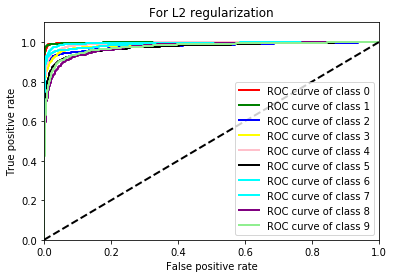

In [30]:
fpr= dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i],tpr[i],t = roc_curve(y_test[:,i],out[:,i])
    roc_auc[i] = auc(fpr[i],tpr[i])
col = ["red","green","blue","yellow","pink","black","aqua","cyan","purple","lightgreen"]
for i,c in zip(range(10),col):
    plt.plot(fpr[i],tpr[i],color=c,lw=2,label=("ROC curve of class "+str(i)))
plt.plot([0,1],[0,1],'k--',lw=2)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('For L2 regularization')
plt.legend(loc="lower right")
plt.show()